<a href="https://colab.research.google.com/github/nilamaula26/Machine-Learning-Specialization-Coursera/blob/main/K-Means%20Proyek%20Terpadu.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import datetime as dt

df = pd.read_excel("/content/sale.xlsx")

In [2]:
df.head()

,waktu_pesan,no_pesan,username,total_bayar
0,2023-11-01 07:40,231101EG6JTVWT,nomnomkang,63986
1,2023-11-01 09:12,231101ENA1R5YN,wdjatmikooo,91414
2,2023-11-01 15:47,231101FBD1QA5G,m4bvrwchjz,125800
3,2023-11-01 10:17,231101ERX736N2,novikartika74,122000
4,2023-11-01 15:47,231101FBCVYRT0,flow_shop17,70334


In [7]:
df['waktu_pesan'] = pd.to_datetime(df['waktu_pesan'])
df['total_bayar'] = df['total_bayar'].astype(float)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 806 entries, 0 to 805
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   waktu_pesan  806 non-null    datetime64[ns]
 1   no_pesan     806 non-null    object        
 2   username     806 non-null    object        
 3   total_bayar  806 non-null    float64       
dtypes: datetime64[ns](1), float64(1), object(2)
memory usage: 25.3+ KB


In [8]:
present = dt.datetime(2023, 12, 31)
rfm= df.groupby('username').agg({'waktu_pesan': lambda date: (present - date.max()).days,
                                 'no_pesan': lambda num: len(num),
                                 'total_bayar': lambda price: price.sum()})

In [11]:
rfm.columns=['recency','frequency', 'monetary']

In [12]:
rfm.head()

,recency,frequency,monetary
username,,,
02041984as,22,1,60800.0
0b5gqiiler,49,1,98267.0
0vnjazgotk,26,1,145000.0
0wr5z9vdr9,26,1,84200.0
0yn97epvjh,55,1,98333.0


In [13]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
rfm = scaler.fit_transform(rfm)

In [16]:
print(rfm)

[[0.38333333 0.         0.02767453]
 [0.83333333 0.         0.0447285 ]
 [0.45       0.         0.06600011]
 ...
 [0.31666667 0.         0.02662763]
 [0.68333333 0.         0.04160055]
 [0.76666667 0.         0.0292863 ]]


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

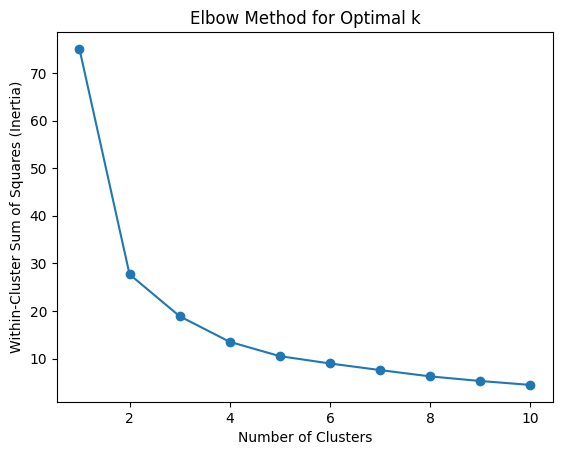

In [20]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(rfm)
    inertia.append(kmeans.inertia_)

# Plot the elbow graph
plt.plot(range(1, 11), inertia, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters')
plt.ylabel('Within-Cluster Sum of Squares (Inertia)')
plt.savefig("elbow.png", format='png')
plt.show()

In [25]:
kmeans = KMeans(n_clusters=3, random_state=0)
kmeans.fit(rfm)
labels = kmeans.labels_

# Get the coordinates of the cluster centers
cluster_centers = kmeans.cluster_centers_

print("Labels:", labels)
print("Cluster Centers:", cluster_centers)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Labels: [0 2 1 1 2 1 0 1 1 1 2 2 0 0 2 1 1 1 0 1 2 2 0 0 0 0 0 1 1 0 0 2 2 2 0 1 0
 0 1 0 2 0 0 1 1 0 2 2 0 0 2 1 0 0 0 1 1 1 0 0 2 2 2 2 2 0 0 0 2 0 1 1 0 2
 2 2 1 1 0 1 2 0 2 2 2 1 0 2 0 2 2 2 1 1 1 0 1 2 0 0 0 2 0 1 0 0 0 1 2 0 2
 0 2 0 1 0 2 0 0 1 0 1 1 2 0 1 1 2 1 2 0 2 2 0 2 1 1 2 1 0 0 1 1 0 1 0 0 2
 2 2 1 0 1 2 0 2 0 0 2 0 2 0 1 2 0 0 0 0 1 1 2 1 0 0 0 1 2 1 2 2 1 0 0 2 2
 1 2 2 0 1 2 0 1 1 2 0 0 1 1 1 1 2 2 2 1 2 2 2 1 2 0 1 1 2 1 1 0 2 1 2 2 0
 0 2 1 1 1 2 1 1 0 1 1 1 2 2 2 0 0 0 1 1 0 0 1 0 2 1 2 0 0 0 0 1 0 2 1 1 1
 0 0 1 2 1 2 1 2 2 0 2 2 2 0 2 1 0 0 2 1 2 0 1 2 2 0 2 0 2 1 0 0 1 2 1 1 2
 0 1 2 1 0 1 1 0 0 0 2 2 2 1 0 0 0 0 2 2 0 0 2 2 0 0 0 2 2 0 2 0 0 0 2 2 2
 1 2 1 0 1 0 0 2 0 0 2 1 0 0 0 2 0 0 1 0 0 1 0 0 0 1 2 1 1 0 0 0 0 0 2 1 2
 2 2 2 2 2 0 0 0 0 0 1 1 2 0 2 1 1 0 0 1 1 2 0 2 1 1 0 2 1 1 1 2 0 2 1 1 0
 0 0 1 2 2 2 1 1 0 2 0 1 2 1 1 2 0 0 1 0 2 0 1 2 2 0 0 1 2 1 0 2 2 0 1 2 1
 1 0 1 2 0 2 0 0 2 2 2 2 0 0 0 1 1 0 1 1 0 2 2 1 0 1 1 1 0 0 0 1 2 2 0 2 1
 2 2 1 2 1 2 2 0 

In [26]:
from collections import Counter

cluster_counts = Counter(labels)

print(cluster_counts)

Counter({0: 283, 2: 239, 1: 238})


In [27]:
from sklearn.metrics import silhouette_score

# Assuming 'X' is your data and 'labels' are the cluster assignments
score = silhouette_score(rfm, labels)

print("Silhouette Score: ", score)

Silhouette Score:  0.5137477123486999
